In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from pandas_profiling import ProfileReport

# Data Reading

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#  Data Cleaning

In [3]:
#summary of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#transform the column totalcharges to numeric datatype
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [5]:
#null observations of column totalcharges
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#drop observations with NaN values
df.dropna(inplace=True)

In [8]:
#unique elements of paymentmethod column
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [9]:
#remove (automatic) from paymentmethod column
df['PaymentMethod']=df['PaymentMethod'].str.replace('(automatic)', '',regex=False)

In [10]:
#unique elements of paymentmethod column
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer ',
       'Credit card '], dtype=object)

In [11]:
#Get max tenure
print(df['tenure'].max())

72


In [12]:
#Group tenure in bins of 12months
labels=["{0} - {1}".format(i,i + 11) for i in range(1,72,12)]
df['tenure_group']=pd.cut(df.tenure,range(1,80,12),right=False,labels=labels)

In [13]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Data Visualization

<AxesSubplot:xlabel='Churn', ylabel='count'>

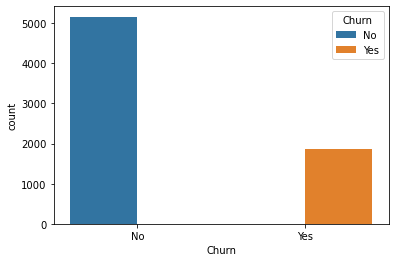

In [15]:
#plot on response variable
sns.countplot(data=df,x='Churn',hue='Churn')

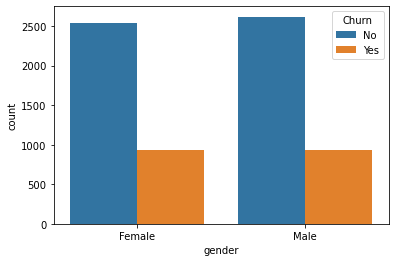

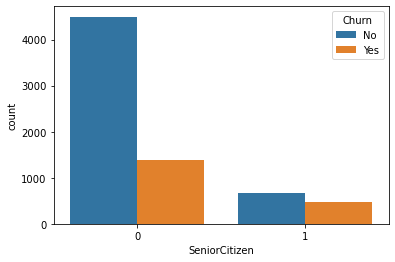

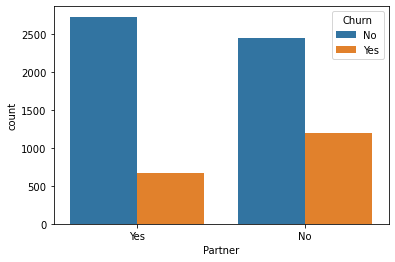

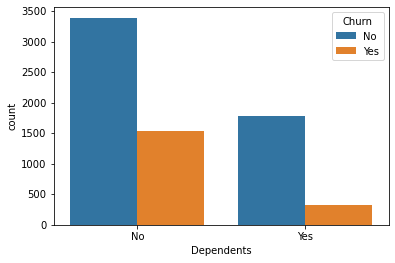

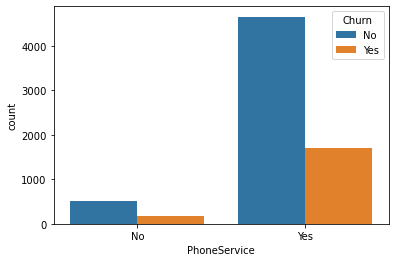

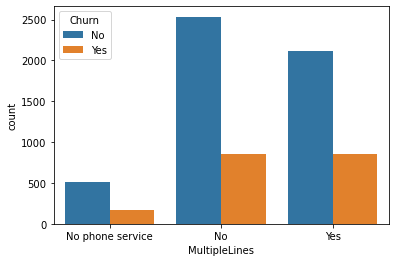

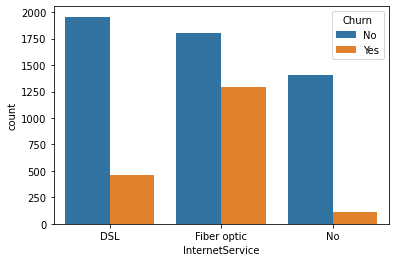

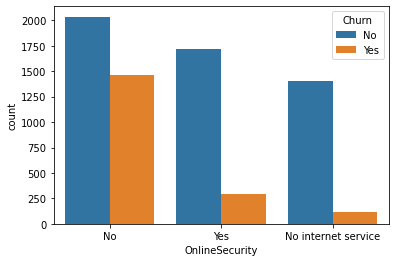

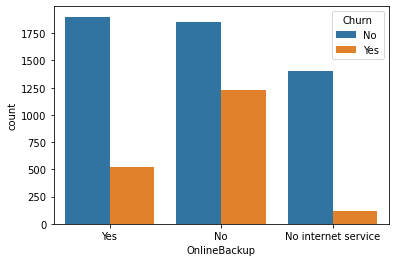

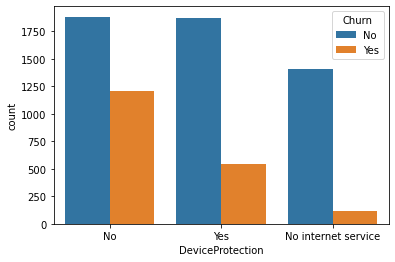

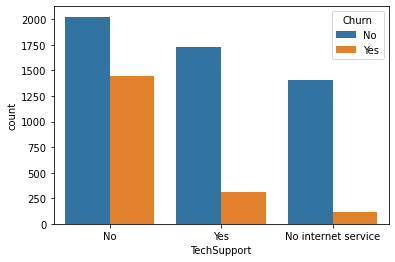

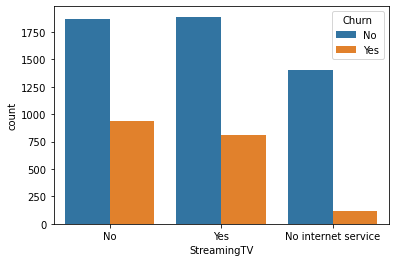

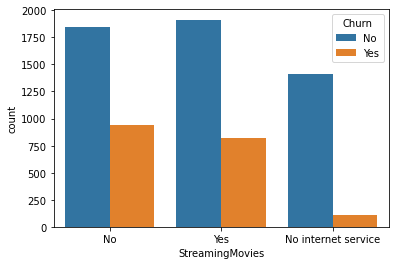

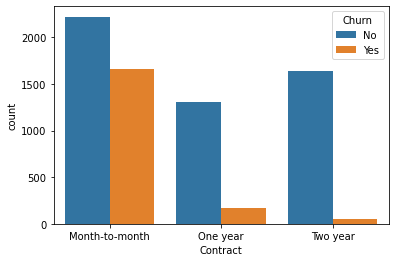

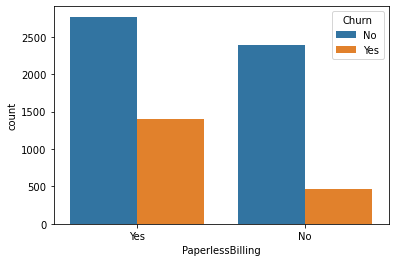

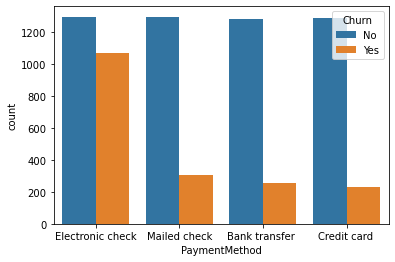

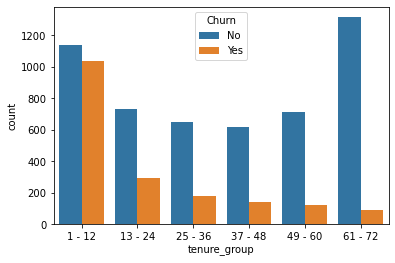

In [16]:
#plot on demographic and services that each customer are using 
for i, predictor in enumerate(df.drop(columns=['customerID','tenure','Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df,x=predictor,hue='Churn')

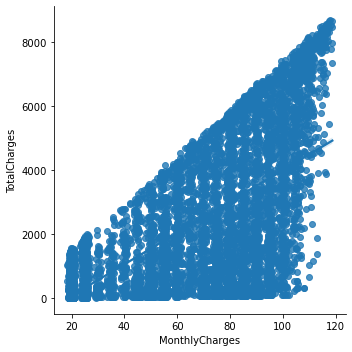

In [17]:
#realtionship between Monthly charges and Total charges
sns.lmplot(data=df,x='MonthlyCharges',y='TotalCharges',fit_reg=True)

TotalCharges increases as MonthlyCharges increases.

Text(0.5, 1.0, 'Monthly charges by churn')

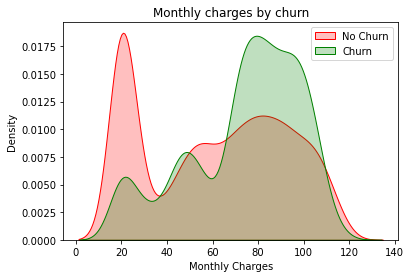

In [29]:
#Churn by MonthlyCharges and TotalCharges
Month = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],color="Red", shade = True)
Month = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],ax =Month, color="Green", shade= True)
Month.legend(["No Churn","Churn"],loc='upper right')
Month.set_ylabel('Density')
Month.set_xlabel('Monthly Charges')
Month.set_title('Monthly charges by churn')

Churn is high when Monthly Charges ar high

Text(0.5, 1.0, 'Total charges by churn')

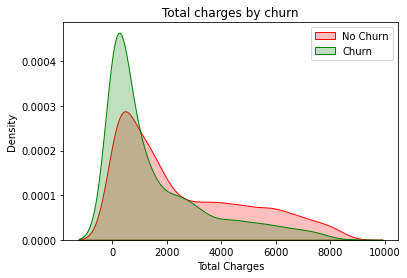

In [27]:
Total = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ], color="Red", shade = True)
Total = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],ax =Total, color="Green", shade= True)
Total.legend(["No Churn","Churn"],loc='upper right')
Total.set_ylabel('Density')
Total.set_xlabel('Total Charges')
Total.set_title('Total charges by churn')

 High Churning rate is seen at lower Total Charges

Text(0.5, 1.0, 'Tenure by churn')

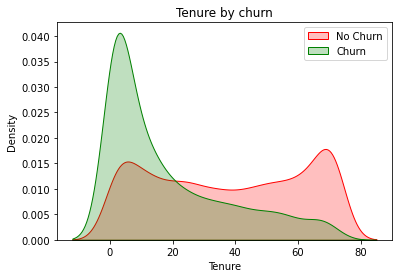

In [28]:
Tenure= sns.kdeplot(df.tenure[(df["Churn"] == 0) ], color="Red", shade = True)
Tenure = sns.kdeplot(df.tenure[(df["Churn"] == 1) ],ax =Tenure, color="Green", shade= True)
Tenure.legend(["No Churn","Churn"],loc='upper right')
Tenure.set_ylabel('Density')
Tenure.set_xlabel('Tenure')
Tenure.set_title('Tenure by churn')

High Churning rate is seen at lower intervals of tenure.

However if we combine the insights of 3 parameters i.e. Monthly Charges,Total Charges & Tenure, then the picture is bit clear that Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors are linked to High Churn.

In [30]:
df.drop(columns=['customerID','tenure'],axis=0,inplace=True)

# Preprocessing 

In [31]:
#converting all categorical variables into  numeric values
enc=LabelEncoder()
for col in['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn','tenure_group']:
    df[col]=enc.fit_transform(df[col])


In [32]:
df['MonthlyCharges']=df['MonthlyCharges'].fillna(0).astype(int)
df['TotalCharges']=df['TotalCharges'].fillna(0).astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7032 non-null   int64
 1   SeniorCitizen     7032 non-null   int64
 2   Partner           7032 non-null   int64
 3   Dependents        7032 non-null   int64
 4   PhoneService      7032 non-null   int64
 5   MultipleLines     7032 non-null   int64
 6   InternetService   7032 non-null   int64
 7   OnlineSecurity    7032 non-null   int64
 8   OnlineBackup      7032 non-null   int64
 9   DeviceProtection  7032 non-null   int64
 10  TechSupport       7032 non-null   int64
 11  StreamingTV       7032 non-null   int64
 12  StreamingMovies   7032 non-null   int64
 13  Contract          7032 non-null   int64
 14  PaperlessBilling  7032 non-null   int64
 15  PaymentMethod     7032 non-null   int64
 16  MonthlyCharges    7032 non-null   int32
 17  TotalCharges      7032 non-null  

In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29,29,0,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56,1889,0,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53,108,1,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42,1840,0,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70,151,1,0


In [35]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

<AxesSubplot:>

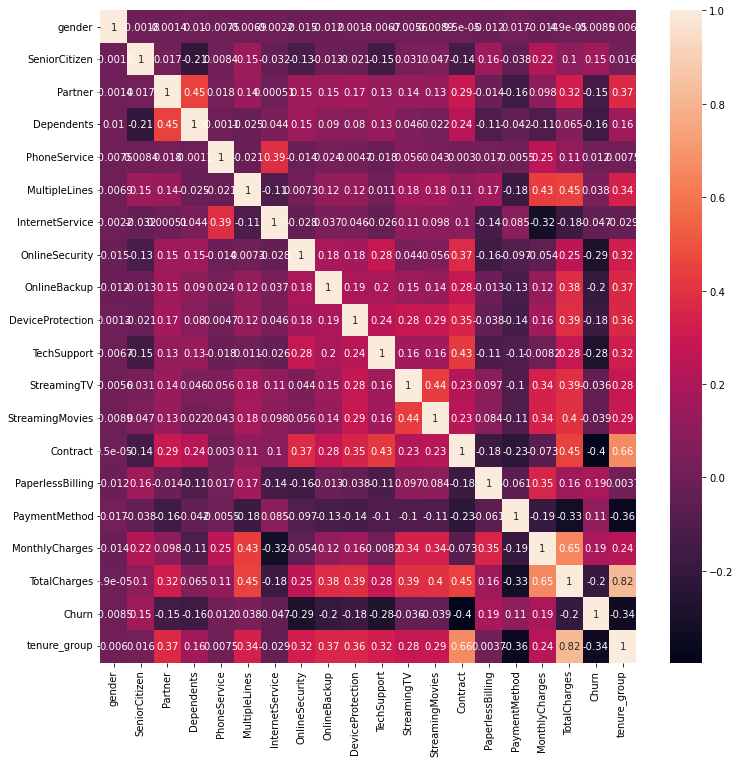

In [36]:
#Build a correlation of all predictors with 'Churn'
cor=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True)

## Feature Selection

In [37]:
x=df.drop(columns=['Churn'])
y=df['Churn']

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [39]:
from sklearn.feature_selection import chi2,SelectKBest

In [40]:
test=SelectKBest(score_func=chi2,k=4)
fit=test.fit(x,y)
fit.scores_

array([2.54297062e-01, 1.33482766e+02, 8.18577694e+01, 1.31271509e+02,
       9.29483891e-02, 9.73596015e+00, 9.71526930e+00, 5.50437364e+02,
       2.29441123e+02, 1.90688004e+02, 5.22164716e+02, 7.37323437e+00,
       8.35762354e+00, 1.11175905e+03, 1.04979224e+02, 5.92405068e+01,
       3.68262286e+03, 6.29765415e+05, 1.39368231e+03])

In [41]:
x_new=test.fit_transform(x,y)
x_new

array([[   0,   29,   29,    0],
       [   1,   56, 1889,    2],
       [   0,   53,  108,    0],
       ...,
       [   0,   29,  346,    0],
       [   0,   74,  306,    0],
       [   2,  105, 6844,    5]], dtype=int64)

In [42]:
chi_support=test.get_support()
chi_feature=x.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)),'selected features')
chi_feature

4 selected features


['Contract', 'MonthlyCharges', 'TotalCharges', 'tenure_group']

# Balancing the data

In [43]:
X=df[['Contract', 'MonthlyCharges', 'TotalCharges', 'tenure_group']]
Y=df[['Churn']]

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
from imblearn.over_sampling import SMOTE
X_resampled,Y_resampled=SMOTE().fit_resample(X,Y)
Y_resampled.value_counts()

Churn
0        5163
1        5163
dtype: int64

# Model Building

In [45]:
model1=LogisticRegression()
model1.fit(X_resampled,Y_resampled) 
pred1=model1.predict(X_test) 
accuracy_score(pred1,Y_test)*100

C:\Users\KEERTHI REDDY\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


69.47867298578198

In [46]:
model2=SVC()
model2.fit(X_resampled,Y_resampled)
pred2=model2.predict(X_test)
accuracy_score(pred2,Y_test)*100

C:\Users\KEERTHI REDDY\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


69.66824644549763

In [47]:
model3=DecisionTreeClassifier() 
model3.fit(X_resampled,Y_resampled)
pred3=model3.predict(X_test) 
accuracy_score(pred3,Y_test)*100

96.30331753554502

In [48]:
model4=RandomForestClassifier() 
model4.fit(X_resampled,Y_resampled)
pred4=model4.predict(X_test)
accuracy_score(pred4,Y_test)*100

C:\Users\KEERTHI REDDY\AppData\Local\Temp\ipykernel_7940\2785718924.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(X_resampled,Y_resampled)


95.63981042654028

In [49]:
model5=KNeighborsClassifier()
model5.fit(X_resampled,Y_resampled)
pred5=model5.predict(X_test) 
accuracy_score(pred5,Y_test)*100

C:\Users\KEERTHI REDDY\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


80.04739336492891

In [50]:
model6=GaussianNB() 
model6.fit(X_resampled,Y_resampled)
pred6=model6.predict(X_test)
accuracy_score(pred6,Y_test)*100

C:\Users\KEERTHI REDDY\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


66.72985781990522

In [51]:

model7=GradientBoostingClassifier() 
model7.fit(X_resampled,Y_resampled)
pred7=model7.predict(X_test) 
accuracy_score(pred7,Y_test)*100

C:\Users\KEERTHI REDDY\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


74.07582938388626

In [52]:
models = [LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),GaussianNB(),GradientBoostingClassifier()]

In [53]:
Name = []
Accuracy = []
for model in models:
    Name.append(type(model).__name__)
    model.fit(X_resampled,Y_resampled)
    prediction = model.predict(X_test)
    accuracyScore = accuracy_score(prediction,Y_test)
    Accuracy.append(accuracyScore)

C:\Users\KEERTHI REDDY\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KEERTHI REDDY\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KEERTHI REDDY\AppData\Local\Temp\ipykernel_7940\3102834534.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_resampled,Y_resampled)
C:\Users\KEERTHI REDDY\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [54]:
Dict = {'Name':Name,'Accuracy':Accuracy}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy
0,LogisticRegression,0.694787
1,SVC,0.696682
2,DecisionTreeClassifier,0.963033
3,RandomForestClassifier,0.955450
4,KNeighborsClassifier,0.800474
5,GaussianNB,0.667299
6,GradientBoostingClassifier,0.740758



# cross validation

In [55]:
classifier=DecisionTreeClassifier()
k=4
cv_result=cross_val_score(classifier,X,Y,cv=k)
print('Accuracy score for each folds:',cv_result)
print('Overall Accuracy:',np.sum(cv_result)/k)

Accuracy score for each folds: [0.721843   0.7298066  0.72810011 0.73094425]
Overall Accuracy: 0.7276734926052332


In [56]:
#Pandas Profiling

profile=ProfileReport(df)

In [57]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [58]:
import pickle

In [59]:
filename='churn.pkl'

In [60]:
pickle.dump(model3,open(filename,'wb'))

In [61]:
load_model=pickle.load(open(filename,'rb'))

In [62]:
#1
load_model.score(X_test,Y_test)

0.9630331753554502

In [63]:
#2
load_model.predict([[0,53,108,0]])[0]


C:\Users\KEERTHI REDDY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [64]:
#3
new_input=[[0,103,5046,4]]

In [65]:
new_output=model3.predict(new_input)

C:\Users\KEERTHI REDDY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [66]:
print(new_output)

[1]


In [67]:
model3.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)